In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

In [2]:
base_dir = os.getcwd()
distancias_km_path = os.path.join(
    base_dir, "..","..", "datos", "raw_data", "df_distance_km.xlsx"
)
distancias_min_path = os.path.join(
    base_dir, "..","..", "datos", "raw_data", "df_distance_min.xlsx"
)
demandas_path = os.path.join(
    base_dir, "..","..", "datos", "raw_data", "df_historic_order_demand.xlsx"
)
lugares_path = os.path.join(
    base_dir, "..","..", "datos", "raw_data", "df_location.xlsx"
)
pedidos_path = os.path.join(
    base_dir, "..","..", "datos", "raw_data", "df_orders.xlsx"
)
vehiculos_path = os.path.join(
    base_dir, "..","..", "datos", "raw_data", "df_vehicle.xlsx"
)
df_distancia_km = pd.read_excel(distancias_km_path)
df_distancia_min = pd.read_excel(distancias_min_path)
df_historico = pd.read_excel(demandas_path)
df_lugares = pd.read_excel(lugares_path)
df_pedidos = pd.read_excel(pedidos_path)
df_vehiculos = pd.read_excel(vehiculos_path)

In [3]:
# Matriz de distancias en km
df_distancia_km

,Cliente_1,Cliente_2,Cliente_3,Cliente_4,Cliente_5,Cliente_6,Cliente_7,Cliente_8,Cliente_9,Cliente_10,...,Cliente_12,Cliente_13,Cliente_14,Cliente_15,Cliente_16,Cliente_17,Cliente_18,Cliente_19,Cliente_20,Almacén
0,0.0000,7.5625,15.5365,1.1998,4.7145,1.7407,7.9408,17.1947,4.2933,3.2659,...,6.0225,5.4470,2.2133,11.1505,1.5775,10.8288,9.1456,20.4871,22.1445,3.6114
1,7.5625,0.0000,3.3838,7.7433,14.5720,8.5237,0.4847,13.7974,10.1522,7.1521,...,10.1049,2.6961,13.4907,18.0835,7.0275,19.8218,8.2737,9.6369,19.1038,10.7361
2,15.5365,3.3838,0.0000,12.5438,0.0000,0.0000,0.0000,16.0355,13.9120,13.0649,...,12.3430,5.0114,15.7289,17.9217,9.6824,22.0599,10.5118,7.7574,16.5997,13.9021
3,1.1998,7.7433,12.5438,0.0000,5.0721,0.9119,7.5798,17.4095,3.5781,3.3451,...,6.2330,4.7117,2.8799,11.3610,1.3127,11.1926,9.3561,20.7019,21.1518,3.3673
4,4.7145,14.5720,0.0000,5.0721,0.0000,4.8187,0.0000,0.0000,0.0000,7.2170,...,6.8738,9.1064,3.6476,12.0019,5.4347,5.2872,9.9969,21.3384,25.5947,4.5417
5,1.7407,8.5237,0.0000,0.9119,4.8187,0.0000,7.8866,20.0472,2.9060,4.0899,...,8.8750,5.0185,3.2185,14.0030,2.0575,11.4008,11.9981,19.7467,20.4797,2.6952
6,7.9408,0.4847,0.0000,7.5798,0.0000,7.8866,0.0000,13.9893,10.1499,7.3440,...,10.2968,0.0000,0.0000,0.0000,7.2194,20.0138,8.4656,9.8289,17.1722,10.9280
7,17.1947,13.7974,16.0355,17.4095,0.0000,20.0472,13.9893,0.0000,19.6963,12.9161,...,12.3127,13.5906,14.8623,5.9742,14.6038,22.6587,8.9984,15.5515,34.1368,20.8703
8,4.2933,10.1522,13.9120,3.5781,0.0000,2.9060,10.1499,19.6963,0.0000,6.8679,...,10.1024,7.7229,4.5536,15.2304,4.8355,9.7565,13.2255,24.5670,22.9781,1.0494
9,3.2659,7.1521,13.0649,3.3451,7.2170,4.0899,7.3440,12.9161,6.8679,0.0000,...,2.3061,4.9896,0.0000,8.2196,0.0000,10.8948,5.3050,17.5604,21.1407,5.9516


In [4]:
df_vehiculos

,vehiculo_id,capacidad_kg,costo_km,autonomia_km
0,1,2026,0.20,603
1,2,4362,0.14,630
2,3,4881,0.20,664
3,4,3321,0.19,514
4,5,10000,0.32,350
5,6,3129,0.14,791


Creamos el grafo de nodos con las relaciones de distancia entre clientes y almacen

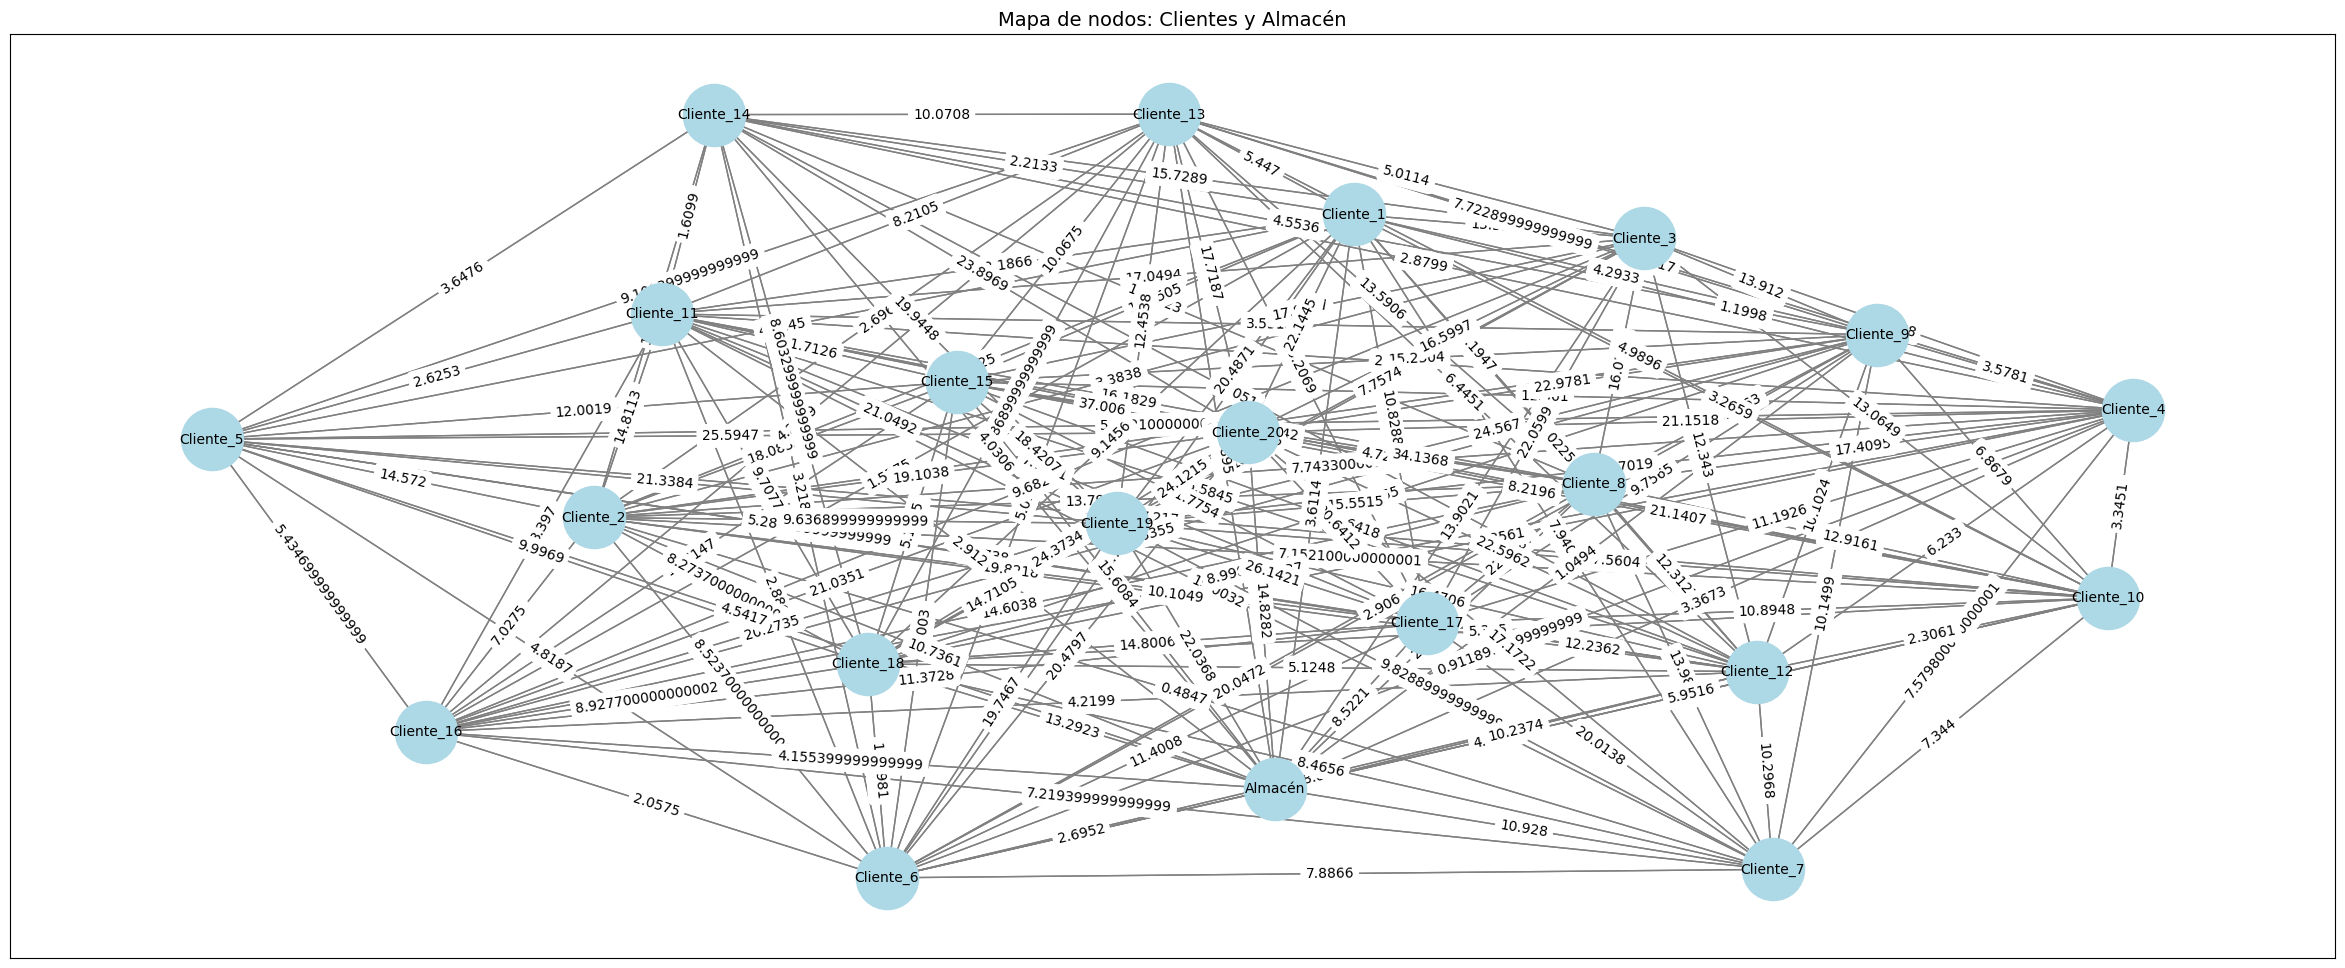

In [5]:
columnas = df_distancia_km.columns
# Crear el grafo
G = nx.DiGraph()

# Agregar nodos y aristas con pesos
for i, row in df_distancia_km.iterrows():
    for j, value in row.items():
        j
        # print(i, columnas[i], df_distance_km.index[i], j, value)
        if value > 0:  # Evitar distancias cero para aristas
            G.add_edge(columnas[i], j, weight=value)

# Dibujar el grafo
pos = nx.spring_layout(G)  # Posicionamiento automático
plt.figure(figsize=(30, 12))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Agregar pesos a las aristas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Mapa de nodos: Clientes y Almacén", fontsize=14)
plt.show()

Encuentra la ruta mas corta del almacen a cada cliente

In [6]:
inicio = 'Almacén'

# Usar el algoritmo de Dijkstra para encontrar el camino más corto
distancias, caminos = nx.single_source_dijkstra(G, inicio)

# Mostrar distancias desde el nodo de inicio a todos los nodos
print("Distancias desde el nodo de inicio:")
for nodo in distancias:
    print(f"Distancia a {nodo}: {distancias[nodo]}")

# Mostrar el camino más corto hacia cada nodo
print("\nCaminos más cortos desde el nodo de inicio:")
for nodo in caminos:
    print(f"Camino más corto a {nodo}: {caminos[nodo]}")

Distancias desde el nodo de inicio:
Distancia a Almacén: 0
Distancia a Cliente_9: 1.0494
Distancia a Cliente_6: 2.6952
Distancia a Cliente_11: 2.912
Distancia a Cliente_4: 3.3673
Distancia a Cliente_1: 3.6114
Distancia a Cliente_14: 4.0306
Distancia a Cliente_16: 4.155399999999999
Distancia a Cliente_5: 4.5417
Distancia a Cliente_10: 5.9516
Distancia a Cliente_13: 7.7137
Distancia a Cliente_12: 8.2577
Distancia a Cliente_17: 8.5221
Distancia a Cliente_2: 10.4098
Distancia a Cliente_7: 10.5818
Distancia a Cliente_18: 11.256599999999999
Distancia a Cliente_3: 12.725100000000001
Distancia a Cliente_15: 13.8995
Distancia a Cliente_20: 14.8282
Distancia a Cliente_8: 18.7592
Distancia a Cliente_19: 20.0467

Caminos más cortos desde el nodo de inicio:
Camino más corto a Almacén: ['Almacén']
Camino más corto a Cliente_1: ['Almacén', 'Cliente_1']
Camino más corto a Cliente_2: ['Almacén', 'Cliente_6', 'Cliente_13', 'Cliente_2']
Camino más corto a Cliente_3: ['Almacén', 'Cliente_6', 'Cliente_13',

Filtrar los datos del grafo a las relaciones directas de almacen con cada cliente

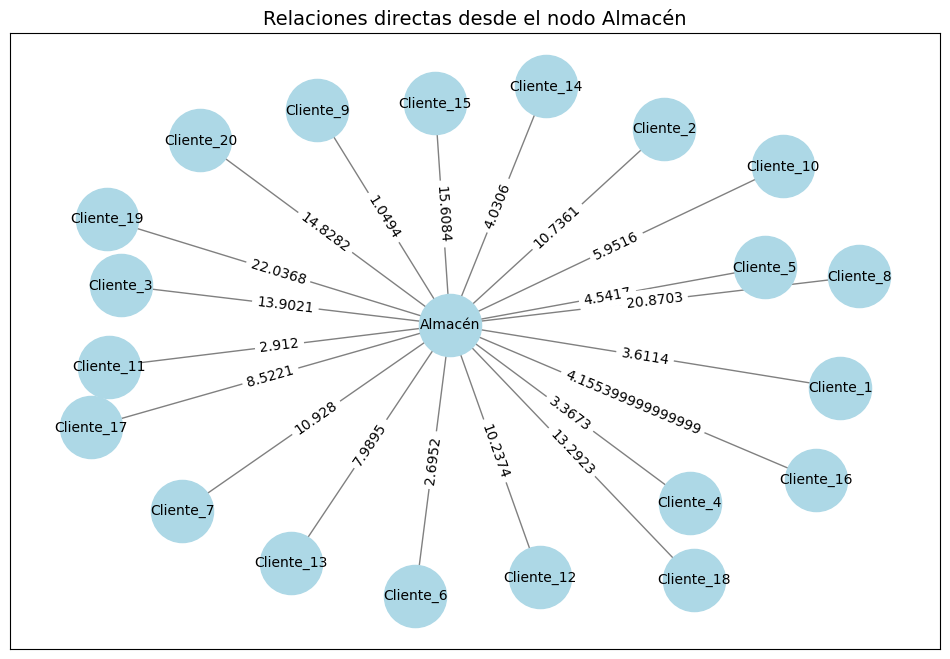

In [7]:
# Filtrar las aristas directas salientes desde "Almacén"
direct_edges = [(u, v, d) for u, v, d in G.edges(data=True) if u == "Almacén"]

# Crear un subgrafo con las relaciones directas
H = nx.DiGraph()
H.add_edges_from((u, v, d) for u, v, d in direct_edges)

# Dibujar el subgrafo
pos = nx.spring_layout(H)  # Posicionamiento automático
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(H, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(H, pos, arrowstyle='->', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(H, pos, font_size=10, font_color='black')

# Agregar pesos a las aristas
edge_labels = nx.get_edge_attributes(H, 'weight')
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)

plt.title("Relaciones directas desde el nodo Almacén", fontsize=14)
plt.show()

In [8]:
df_distancia_min

,Cliente_1,Cliente_2,Cliente_3,Cliente_4,Cliente_5,Cliente_6,Cliente_7,Cliente_8,Cliente_9,Cliente_10,...,Cliente_12,Cliente_13,Cliente_14,Cliente_15,Cliente_16,Cliente_17,Cliente_18,Cliente_19,Cliente_20,Almacén
0,0.000000,15.731667,19.651667,2.543333,7.550000,3.760000,15.838333,22.388333,8.563333,7.185000,...,10.028333,12.336667,5.098333,17.525000,2.943333,15.548333,15.105000,23.855000,23.700000,6.905000
1,15.731667,0.000000,7.505000,15.798333,17.241667,17.316667,1.248333,20.700000,21.325000,13.503333,...,14.423333,6.695000,15.891667,20.061667,14.023333,26.153333,14.803333,14.235000,21.908333,20.381667
2,19.651667,7.505000,0.000000,19.285000,0.000000,0.000000,0.000000,22.076667,19.981667,17.378333,...,15.800000,11.541667,17.270000,20.405000,18.500000,27.531667,16.181667,13.023333,18.080000,20.873333
3,2.543333,15.798333,19.285000,0.000000,8.533333,1.878333,16.521667,22.863333,7.165000,7.013333,...,10.501667,10.768333,6.181667,18.000000,2.465000,16.546667,15.580000,24.328333,23.030000,7.400000
4,7.550000,17.241667,0.000000,8.533333,0.000000,9.711667,0.000000,0.000000,0.000000,11.058333,...,8.793333,18.555000,7.391667,16.291667,10.738333,9.998333,13.871667,22.620000,28.093333,7.938333
5,3.760000,17.316667,0.000000,1.878333,9.711667,0.000000,17.068333,22.668333,6.033333,8.281667,...,10.308333,11.315000,7.038333,17.806667,3.733333,16.240000,15.386667,23.876667,21.898333,6.268333
6,15.838333,1.248333,0.000000,16.521667,0.000000,17.068333,0.000000,20.826667,20.988333,13.631667,...,14.550000,0.000000,0.000000,0.000000,14.150000,26.281667,14.931667,14.363333,21.193333,20.510000
7,22.388333,20.700000,22.076667,22.863333,0.000000,22.668333,20.826667,0.000000,25.133333,16.505000,...,15.503333,20.850000,18.231667,10.558333,18.380000,22.963333,15.533333,20.250000,30.101667,23.618333
8,8.563333,21.325000,19.981667,7.165000,0.000000,6.033333,20.988333,25.133333,0.000000,13.976667,...,12.048333,15.173333,9.086667,19.546667,9.428333,13.025000,17.126667,25.875000,25.266667,1.841667
9,7.185000,13.503333,17.378333,7.013333,11.058333,8.281667,13.631667,16.505000,13.976667,0.000000,...,5.411667,10.275000,0.000000,13.880000,0.000000,18.623333,10.886667,20.208333,26.283333,11.388333


Creamos el grafo de nodos con las relaciones de tiempo entre clientes y almacen

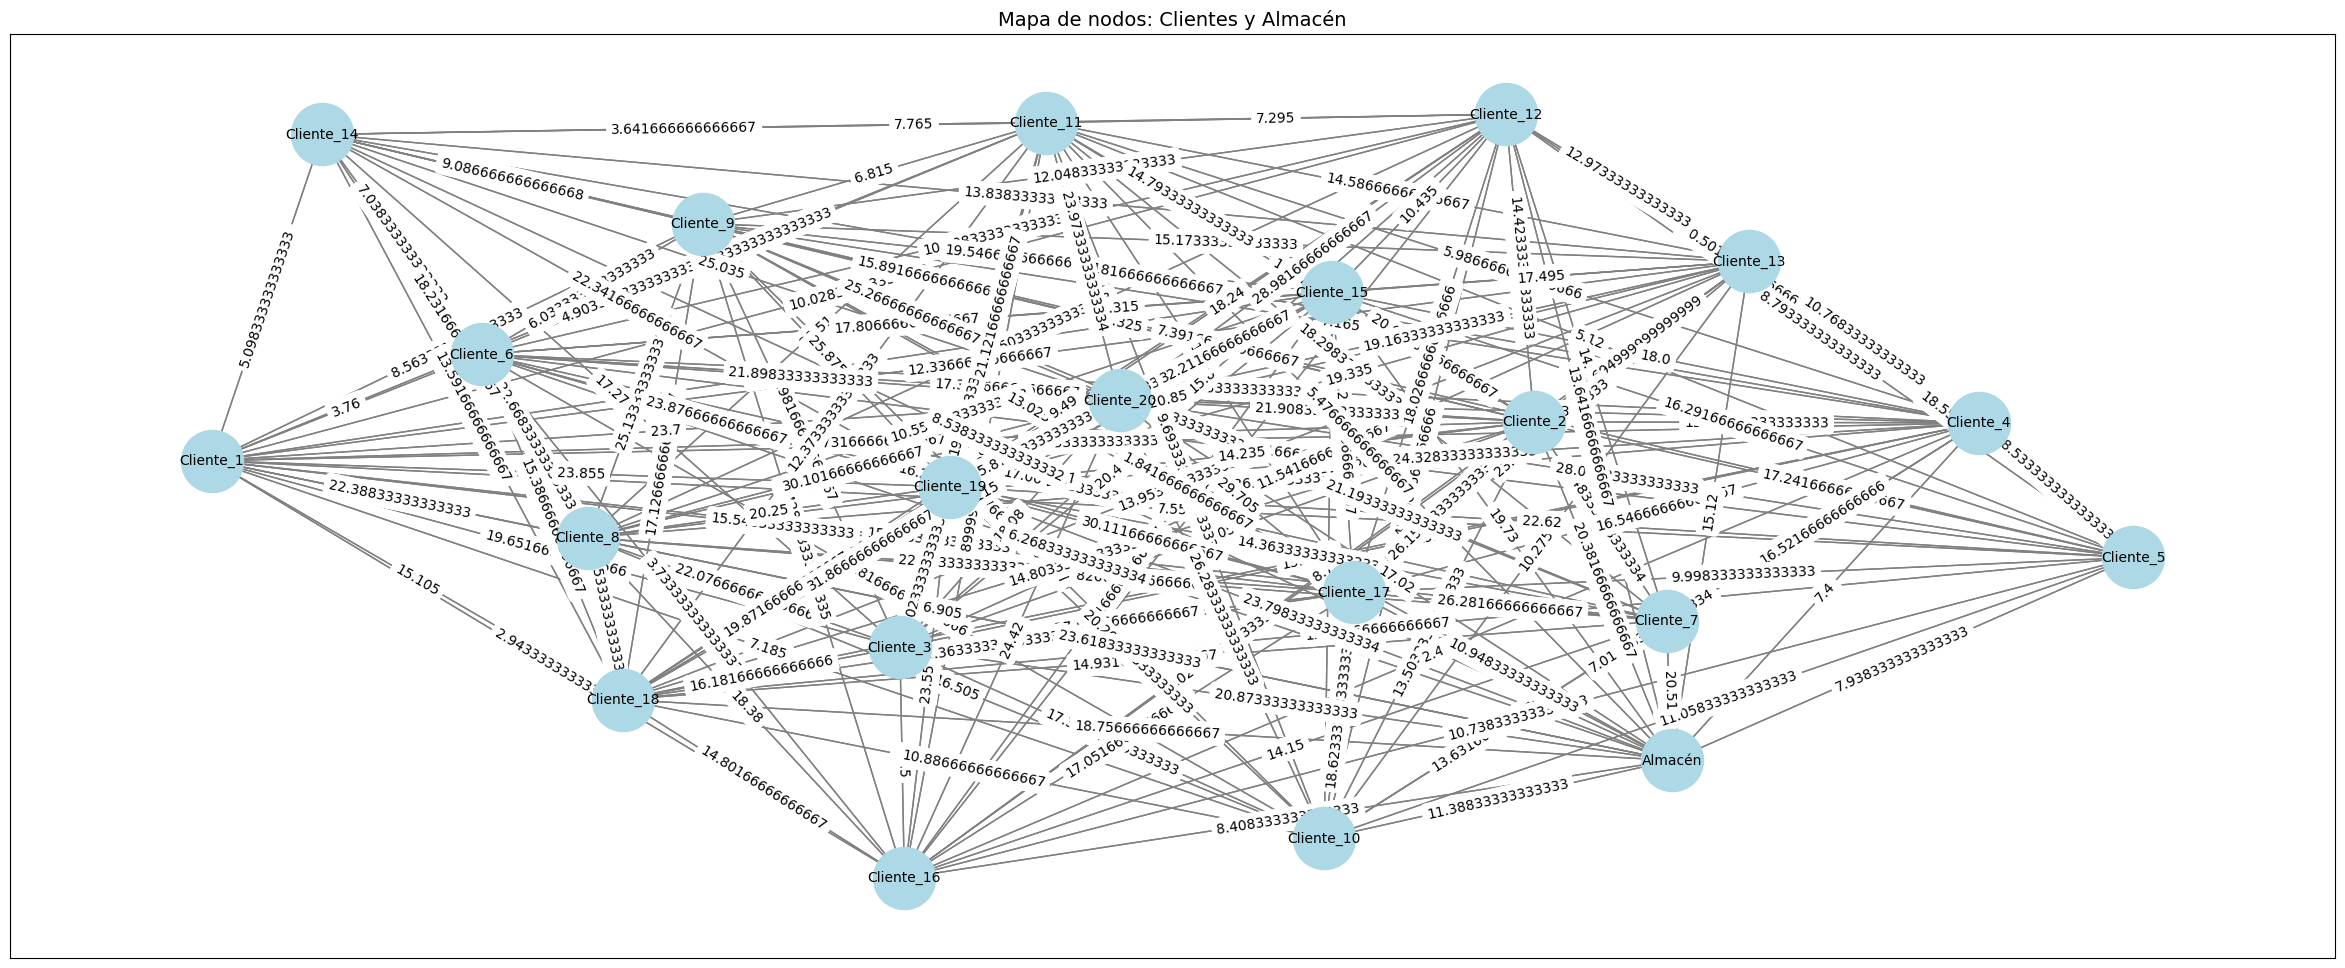

In [9]:
columnas = df_distancia_min.columns
# Crear el grafo
G = nx.DiGraph()

# Agregar nodos y aristas con pesos
for i, row in df_distancia_min.iterrows():
    for j, value in row.items():
        # print(i, columnas[i], df_distance_km.index[i], j, value)
        if value > 0:  # Evitar distancias cero para aristas
            G.add_edge(columnas[i], j, weight=value)

# Dibujar el grafo
pos = nx.spring_layout(G)  # Posicionamiento automático
plt.figure(figsize=(30, 12))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Agregar pesos a las aristas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Mapa de nodos: Clientes y Almacén", fontsize=14)
plt.show()

Encuentra la ruta mas corta en tiempo del almacen a cada cliente

In [10]:
inicio = 'Almacén'

# Usar el algoritmo de Dijkstra para encontrar el camino más corto
distancias, caminos = nx.single_source_dijkstra(G, inicio)

# Mostrar distancias desde el nodo de inicio a todos los nodos
print("Distancias desde el nodo de inicio:")
for nodo in distancias:
    print(f"Distancia a {nodo}: {distancias[nodo]}")

# Mostrar el camino más corto hacia cada nodo
print("\nCaminos más cortos desde el nodo de inicio:")
for nodo in caminos:
    print(f"Camino más corto a {nodo}: {caminos[nodo]}")

Distancias desde el nodo de inicio:
Distancia a Almacén: 0
Distancia a Cliente_9: 1.841666666666667
Distancia a Cliente_11: 5.476666666666667
Distancia a Cliente_6: 6.268333333333334
Distancia a Cliente_1: 6.905
Distancia a Cliente_4: 7.4
Distancia a Cliente_5: 7.938333333333333
Distancia a Cliente_16: 8.408333333333333
Distancia a Cliente_14: 8.538333333333332
Distancia a Cliente_17: 10.94833333333333
Distancia a Cliente_10: 11.38833333333333
Distancia a Cliente_12: 12.771666666666667
Distancia a Cliente_13: 15.12
Distancia a Cliente_20: 17.02
Distancia a Cliente_18: 17.849999999999994
Distancia a Cliente_15: 19.73
Distancia a Cliente_2: 20.38166666666667
Distancia a Cliente_7: 20.51
Distancia a Cliente_3: 20.87333333333333
Distancia a Cliente_8: 23.61833333333333
Distancia a Cliente_19: 23.79833333333334

Caminos más cortos desde el nodo de inicio:
Camino más corto a Almacén: ['Almacén']
Camino más corto a Cliente_1: ['Almacén', 'Cliente_1']
Camino más corto a Cliente_2: ['Almacén', 

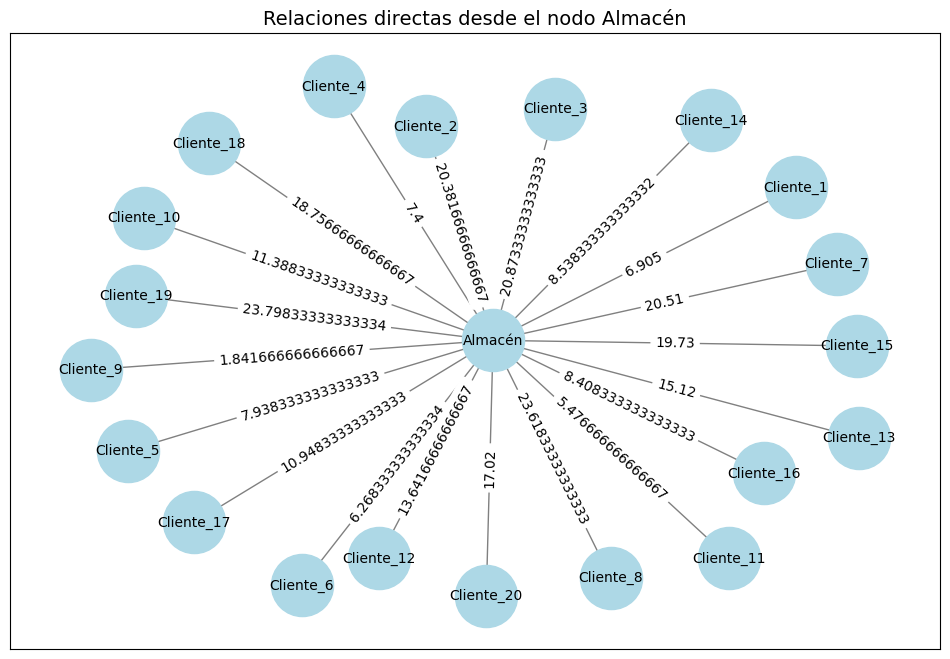

In [11]:
# Filtrar las aristas directas salientes desde "Almacén"
direct_edges = [(u, v, d) for u, v, d in G.edges(data=True) if u == "Almacén"]

# Crear un subgrafo con las relaciones directas
H = nx.DiGraph()
H.add_edges_from((u, v, d) for u, v, d in direct_edges)

# Dibujar el subgrafo
pos = nx.spring_layout(H)  # Posicionamiento automático
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(H, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(H, pos, arrowstyle='->', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(H, pos, font_size=10, font_color='black')

# Agregar pesos a las aristas
edge_labels = nx.get_edge_attributes(H, 'weight')
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)

plt.title("Relaciones directas desde el nodo Almacén", fontsize=14)
plt.show()